# Exploring the Rosetta Stone of Human Capital

This project examines and replicates the study called ['A Rosetta Stone of Human Capital'](https://www.cgdev.org/publication/rosetta-stone-human-capital), by Dev Patel and Justin Sandefur. 


To execute this notebook, it is assumed that all replication data files used should be downloaded and stored in the same directory as this notebook.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

%matplotlib inline

First, the dataset of the results of the study is loaded. It shows the scores of each country in the reading and math test

In [2]:
country_scores = pd.read_excel('patel-sandefur-human-capital-final-results.xlsx',sheet_name='Country Scores')
country_scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


## Income and Test Results

First, we will examine the relationship between the results just mentioned and the income of a country (GDP). So we load the following dataset with information on income.

In [3]:
wdi = pd.read_csv('WDI_data.csv')
wdi = wdi[wdi["2015 [YR2015]"]!=".."].rename(columns={"2015 [YR2015]":"GDP"})
wdi

,Country Name,Country Code,Series Name,Series Code,GDP
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
5,Albania,ALB,"School enrollment, primary (% gross)",SE.PRM.ENRR,109.76244354248
...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN
795,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


In [4]:
wdi2 = wdi[wdi["Series Name"] == "GDP per capita, PPP (constant 2011 international $)"]
wdi2 = wdi2[["Country Code","GDP"]]
wdi2[["GDP"]] = np.log(wdi2[["GDP"]].astype(float))
wdi2

,Country Code,GDP
0,AFG,7.500539
3,ALB,9.303037
6,DZA,9.526954
15,AGO,8.737303
18,ATG,9.911205
...,...,...
777,PSE,8.375423
780,WLD,9.600119
783,YEM,7.878930
786,ZMB,8.196217


In [5]:
cc1 = country_scores[["Country Code","Median Math Score (TIMSS Scale, 4th Grade)"]]
q1_timss = pd.merge(cc1,wdi2,on="Country Code")
q1_timss.rename(inplace=True,columns={"Median Math Score (TIMSS Scale, 4th Grade)": "TIMSS"})
q1_timss.dropna(inplace=True)
q1_timss

,Country Code,TIMSS,GDP
0,ARE,437.000000,11.097037
1,ARG,406.652557,9.857512
2,ARM,454.000000,9.011393
3,AUS,520.000000,10.685550
4,AUT,511.000000,10.699955
...,...,...,...
72,TUN,362.000000,9.282648
73,TUR,477.000000,10.059999
74,URY,424.912933,9.895024
75,USA,544.000000,10.878600


After we've modified and unified the previous datasets, we run a linear regression on logged income and test scores.

In [6]:
mod = smf.ols("TIMSS ~ GDP", data=q1_timss)
result1 = mod.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMSS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        23:25:38   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.492     -87.013     179.247
GDP           41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Then the values that we ran the regression on, are plotted in a scatter plot.

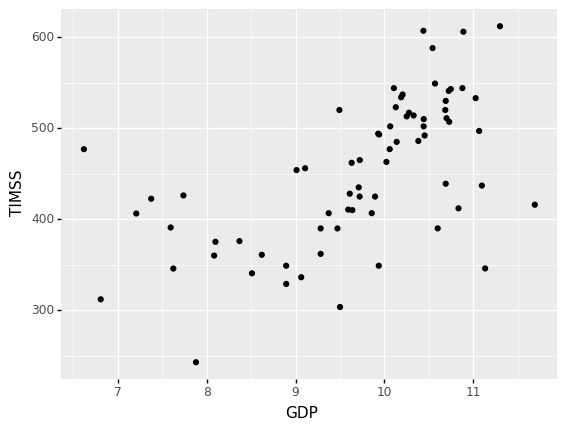

<ggplot: (-9223363256931101973)>

In [7]:
ggplot(data=q1_timss) +\
    geom_point(mapping=aes(x='GDP', y='TIMSS'))

We do the same for the reading test.

In [8]:
cc2 = country_scores[["Country Code","Median Reading Score (PIRLS Scale, 4th Grade)"]]
q1_pirls = pd.merge(cc2,wdi2,on="Country Code")
q1_pirls.rename(inplace=True,columns={"Median Reading Score (PIRLS Scale, 4th Grade)": "PIRLS"})
q1_pirls.dropna(inplace=True)
q1_pirls

,Country Code,PIRLS,GDP
0,ARE,440.000000,11.097037
1,ARG,431.443542,9.857512
3,AUS,534.000000,10.685550
4,AUT,533.000000,10.699955
5,AZE,467.000000,9.723096
...,...,...,...
69,TGO,374.490417,7.207394
71,TTO,474.000000,10.350845
74,URY,450.448608,9.895024
75,USA,560.000000,10.878600


In [9]:
mod = smf.ols("PIRLS ~ GDP", data=q1_pirls)
result2 = mod.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PIRLS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           2.48e-10
Time:                        23:25:40   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.463     -72.762     158.000
GDP           43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

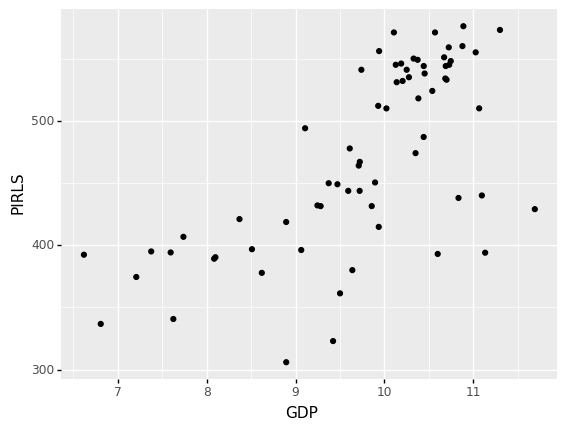

<ggplot: (-9223363256933328345)>

In [10]:
ggplot(data=q1_pirls) +\
    geom_point(mapping=aes(x='GDP', y='PIRLS'))

Income seems to have a significant correlation with TIMSS and PIRLS, since p-values are zero and R-squared is relatively high on both models

## Years of Schooling and Test Scores

We next try to find how years of schooling are correlated to test results, and if they can explain what remains unexplained by the previous model.

In [11]:
schooling_years = pd.read_stata('BL2013_MF1599_v2.2.dta')
schooling_years = schooling_years[schooling_years["year"] > 2009]
schooling_years = schooling_years[["WBcode","yr_sch"]]
schooling_years.rename(inplace=True,columns={"WBcode": "Country Code"})
gdp_sch = pd.merge(schooling_years,wdi2,on="Country Code")
gdp_sch

,Country Code,yr_sch,GDP
0,DZA,6.678049,9.526954
1,BEN,4.430164,7.594465
2,BWA,9.554915,9.639291
3,BDI,3.346481,6.617958
4,CMR,6.154877,8.098358
...,...,...,...
133,LVA,10.646180,10.044067
134,LTU,10.894826,10.205284
135,SVN,11.890487,10.276352
136,MAC,8.543072,11.517361


In [12]:
mod = smf.ols("yr_sch ~ GDP", data=gdp_sch)
result3 = mod.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     214.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           9.39e-30
Time:                        23:25:41   Log-Likelihood:                -274.97
No. Observations:                 138   AIC:                             553.9
Df Residuals:                     136   BIC:                             559.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.4605      1.154     -7.331      0.000     -10.743      -6.178
GDP            1.7974      0.123     14.649      0.000       1.555       2.040
==============================================================================
Omnibus:                        0.688   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.383
Skew:                          -0.105   Prob(JB):                        0.826
Kurtosis:                       3.150   Cond. No.                         72.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Income definitely affects years of schooling in all countries. We can see a high R-squared value and zero p-value, so the model made is statistically significant.

In [13]:
sch_gdp_resid = gdp_sch.join(pd.DataFrame(data = result3.resid.values, columns = ["sch_residual"]))
timss_gdp_resid = q1_timss.join(pd.DataFrame(data = result1.resid.values, columns = ["timss_residual"]),how="inner")
timss_sch = pd.merge(timss_gdp_resid,sch_gdp_resid,on="Country Code",how="inner")
timss_sch = timss_sch[["Country Code","timss_residual","sch_residual"]]
timss_sch.head()

,Country Code,timss_residual,sch_residual
0,ARE,-72.373659,-2.419059
1,ARG,-50.975909,0.252532
2,ARM,31.693559,2.989538
3,AUS,27.804280,0.795004
4,AUT,18.202895,-1.168693


In [14]:
mod = smf.ols("timss_residual ~ sch_residual", data=timss_sch)
result4 = mod.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         timss_residual   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.2014
Date:                Mon, 28 Dec 2020   Prob (F-statistic):              0.655
Time:                        23:25:42   Log-Likelihood:                -331.64
No. Observations:                  60   AIC:                             667.3
Df Residuals:                      58   BIC:                             671.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9092      8.019      0.113      0.910     -15.144      16.962
sch_residual     2.1289      4.744      0.449      0.655      -7.368      11.626
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.575
Skew:                          -0.240   Prob(JB):                        0.750
Kurtosis:                       2.991   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

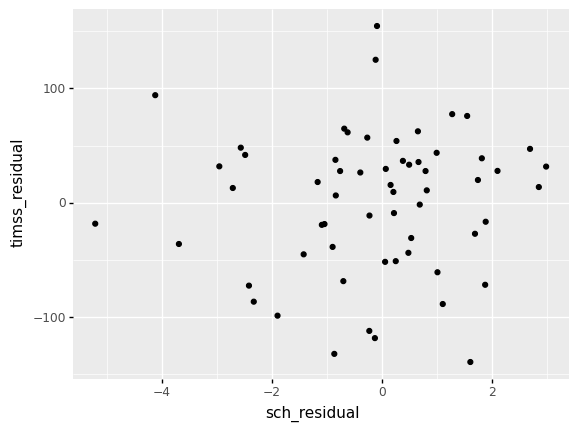

<ggplot: (-9223363256933373850)>

In [15]:
ggplot(data=timss_sch) +\
    geom_point(mapping=aes(x='sch_residual', y='timss_residual'))

In [16]:
pirls_gdp_resid = q1_pirls.join(pd.DataFrame(data = result2.resid.values, columns = ["pirls_residual"]),how="inner")
pirls_sch = pd.merge(pirls_gdp_resid,sch_gdp_resid,on="Country Code")
pirls_sch = pirls_sch[["Country Code","pirls_residual","sch_residual"]]
pirls_sch.head()

,Country Code,pirls_residual,sch_residual
0,ARE,-89.916813,-2.419059
1,ARG,-44.042720,0.252532
2,AUS,20.519995,0.795004
3,AUT,-2.583750,-1.168693
4,BDI,18.086246,-0.088434


In [17]:
mod = smf.ols("pirls_residual ~ sch_residual", data=pirls_sch)
result5 = mod.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pirls_residual   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.08020
Date:                Mon, 28 Dec 2020   Prob (F-statistic):              0.778
Time:                        23:25:43   Log-Likelihood:                -312.09
No. Observations:                  58   AIC:                             628.2
Df Residuals:                      56   BIC:                             632.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1116      7.044      0.300      0.765     -12.000      16.223
sch_residual     1.2314      4.348      0.283      0.778      -7.479       9.942
==============================================================================
Omnibus:                       12.226   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.767
Skew:                          -1.105   Prob(JB):                      0.00169
Kurtosis:                       3.633   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

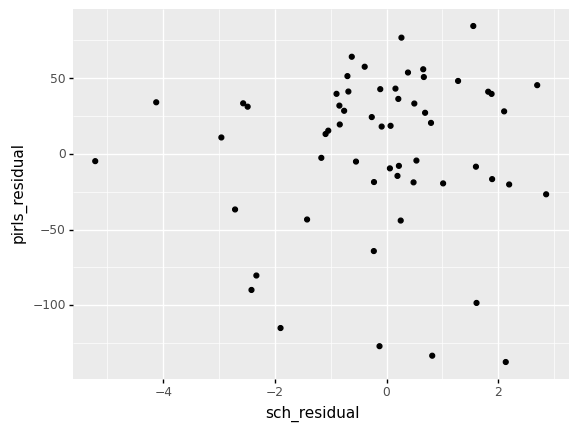

<ggplot: (8779921404003)>

In [18]:
ggplot(data=pirls_sch) +\
    geom_point(mapping=aes(x='sch_residual', y='pirls_residual'))

The residuals of TIMSS and PIRLS don't seem to be correlated with the schooling years residuals. R-squared is zero and p-values are high. We can see that from the plots too, which seem to lack any patterns.

## Compare New and Previous Estimates

Finally, data from the World Bank are brought in to be compared to the study's results. This way we can find out if the findings make sense.

In [19]:
hlo = pd.read_stata('HLO Panel Data (mean, thresh) - Jan 2018.dta')
hlo.dropna(inplace=True,subset=["low_threshold"])
hlo

,country,idcntry,cntabb,year,HLO,low_threshold
9,"Abu Dhabi, UAE",7842,ADA,2010,428.679993,73.830002
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
18,Albania,8,ALB,2000,400.649994,57.750000
19,Albania,8,ALB,2005,399.320007,60.150002
20,Albania,8,ALB,2010,402.750000,61.320000
...,...,...,...,...,...,...
1824,Zambia,894,ZMB,2005,324.459991,27.500000
1833,Zanzibar,9834,ZAN,1995,347.700012,17.840000
1834,Zanzibar,9834,ZAN,2000,310.540009,34.330002
1835,Zanzibar,9834,ZAN,2005,321.880005,38.040001


In [20]:
grouped = hlo.groupby('cntabb')
hlo2 = pd.DataFrame(columns=['country','idcntry','cntabb','year','HLO','low_threshold'])
for name, group in grouped:
    hlo2 = hlo2.append(group.loc[group['year'].idxmax()])
hlo2

,country,idcntry,cntabb,year,HLO,low_threshold
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
526,"Dubai, UAE",7841,ADU,2015,510.089996,91.440002
21,Albania,8,ALB,2015,436.730011,70.650002
54,"Argentina, Buenos Aires",974,ARB,2015,414.190002,67.750000
1760,United Arab Emirates,784,ARE,2015,460.489990,80.839996
...,...,...,...,...,...,...
1814,Yemen,887,YEM,2010,297.200012,40.000000
1560,South Africa,710,ZAF,2015,374.059998,53.200001
1835,Zanzibar,9834,ZAN,2005,321.880005,38.040001
1824,Zambia,894,ZMB,2005,324.459991,27.500000


In [21]:
hlo_timss = pd.merge(country_scores[["Country Code","Percent Above Math Benchmark (400 on TIMSS Scale)"]],hlo2[["cntabb","low_threshold"]],left_on="Country Code",right_on="cntabb",how="inner")
hlo_pirls = pd.merge(country_scores[["Country Code","Percent Above Reading Benchmark (400 on PIRLS Scale)"]],hlo2[["cntabb","low_threshold"]],left_on="Country Code",right_on="cntabb",how="inner")
hlo_timss.drop("cntabb",axis=1,inplace=True)
hlo_pirls.drop("cntabb",axis=1,inplace=True)
hlo_timss.dropna(inplace=True)
hlo_pirls.dropna(inplace=True)
hlo_timss.rename(inplace=True,columns={"Percent Above Math Benchmark (400 on TIMSS Scale)": "New estimate of portion above 400 on TIMSS","low_threshold":"World Bank Estimates"})
hlo_pirls.rename(inplace=True,columns={"Percent Above Reading Benchmark (400 on PIRLS Scale)": "New estimate of portion above 400 on PIRLS","low_threshold":"World Bank Estimates"})
hlo_pirls

,Country Code,New estimate of portion above 400 on PIRLS,World Bank Estimates
0,ARE,63.982311,80.839996
1,ARG,66.000000,70.860001
3,AUS,92.932800,91.529999
4,AUT,97.104111,88.510002
5,AZE,81.859566,77.459999
...,...,...,...
68,TGO,27.000000,39.049999
70,TTO,77.998352,70.300003
73,URY,70.000000,72.650002
74,USA,97.517357,93.300003


In [22]:
stats.spearmanr(hlo_pirls["New estimate of portion above 400 on PIRLS"],hlo_pirls["World Bank Estimates"])

SpearmanrResult(correlation=0.904517341824943, pvalue=5.290584772193869e-25)

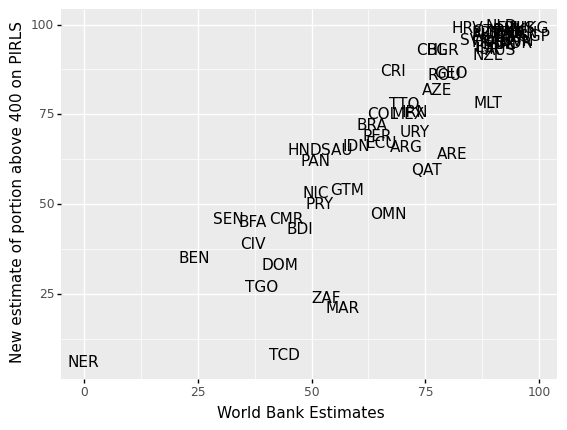

<ggplot: (-9223363256933314367)>

In [23]:
ggplot(data=hlo_pirls, mapping=aes(x="World Bank Estimates", y="New estimate of portion above 400 on PIRLS")) +\
    geom_text(mapping=aes(label='Country Code'), data=hlo_pirls)

In [24]:
stats.spearmanr(hlo_timss["New estimate of portion above 400 on TIMSS"],hlo_timss["World Bank Estimates"])

SpearmanrResult(correlation=0.8973790562032015, pvalue=1.6879737641244243e-25)

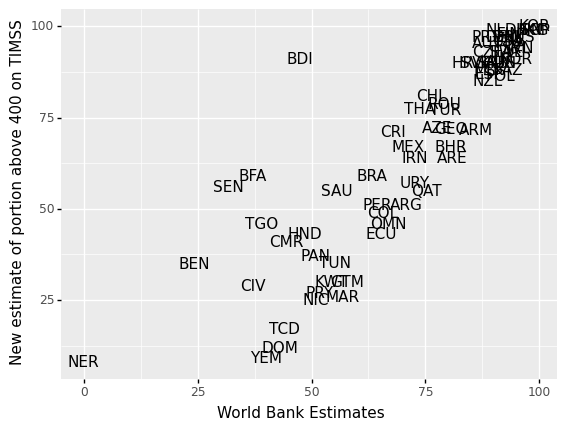

<ggplot: (-9223363256933313781)>

In [25]:
ggplot(data=hlo_timss, mapping=aes(x="World Bank Estimates", y="New estimate of portion above 400 on TIMSS")) +\
    geom_text(mapping=aes(label='Country Code'), data=hlo_timss)

There seems to be a strong correlation between the two estimates of each test, which indicates that the authors of the study found valid results.